In [1]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", font_scale=1.5, style="white")
import scipy.stats as st

import scona as scn
from scona.scripts.visualisation_commands import view_corr_mat

In [2]:
#Sets path directory
import os
os.chdir('C:/Users/Emre/OneDrive/Penn State/Masters Data')

#loads dataset
area = pd.read_csv('Freesurfer_thickness_nosub_subjrmv.csv')
area.head()

,lh_G&S_frontomargin_thickness,lh_G&S_occipital_inf_thickness,lh_G&S_paracentral_thickness,lh_G&S_subcentral_thickness,lh_G&S_transv_frontopol_thickness,lh_G&S_cingul-Ant_thickness,lh_G&S_cingul-Mid-Ant_thickness,lh_G&S_cingul-Mid-Post_thickness,lh_G_cingul-Post-dorsal_thickness,lh_G_cingul-Post-ventral_thickness,...,rh_S_parieto_occipital_thickness,rh_S_pericallosal_thickness,rh_S_postcentral_thickness,rh_S_precentral-inf-part_thickness,rh_S_precentral-sup-part_thickness,rh_S_suborbital_thickness,rh_S_subparietal_thickness,rh_S_temporal_inf_thickness,rh_S_temporal_sup_thickness,rh_S_temporal_transverse_thickness
0,1.888,2.683,2.494,2.679,2.191,2.245,2.616,2.603,2.680,2.522,...,2.381,1.921,2.144,2.395,2.472,1.463,2.503,2.541,2.625,2.419
1,2.195,2.670,2.399,2.503,2.516,2.723,2.771,2.534,2.852,2.608,...,2.196,1.756,2.093,2.247,2.296,2.778,2.246,2.492,2.413,2.182
2,2.654,2.277,1.943,2.447,2.442,2.575,2.541,2.381,2.413,2.794,...,1.789,1.852,1.886,2.042,2.057,2.408,2.111,2.140,2.243,1.656
3,3.003,2.595,2.331,3.042,2.598,2.654,2.579,2.488,2.943,2.509,...,2.312,1.865,2.300,2.356,2.607,2.230,2.442,2.672,2.658,2.661
4,2.338,2.315,2.282,2.622,2.484,2.698,2.733,2.362,2.763,2.413,...,1.534,1.375,1.740,2.283,1.646,2.432,1.640,2.129,2.423,2.201


In [3]:
#loads list of brain regions
names = []
with open('region_names_thickness.txt') as f:
    names = f.readlines()

names = [''.join(item.split()) for item in names]

f.close()

In [4]:
print(names)

['lh_G&S_frontomargin_thickness', 'lh_G&S_occipital_inf_thickness', 'lh_G&S_paracentral_thickness', 'lh_G&S_subcentral_thickness', 'lh_G&S_transv_frontopol_thickness', 'lh_G&S_cingul-Ant_thickness', 'lh_G&S_cingul-Mid-Ant_thickness', 'lh_G&S_cingul-Mid-Post_thickness', 'lh_G_cingul-Post-dorsal_thickness', 'lh_G_cingul-Post-ventral_thickness', 'lh_G_cuneus_thickness', 'lh_G_front_inf-Opercular_thickness', 'lh_G_front_inf-Orbital_thickness', 'lh_G_front_inf-Triangul_thickness', 'lh_G_front_middle_thickness', 'lh_G_front_sup_thickness', 'lh_G_Ins_lg&S_cent_ins_thickness', 'lh_G_insular_short_thickness', 'lh_G_occipital_middle_thickness', 'lh_G_occipital_sup_thickness', 'lh_G_oc-temp_lat-fusifor_thickness', 'lh_G_oc-temp_med-Lingual_thickness', 'lh_G_oc-temp_med-Parahip_thickness', 'lh_G_orbital_thickness', 'lh_G_pariet_inf-Angular_thickness', 'lh_G_pariet_inf-Supramar_thickness', 'lh_G_parietal_sup_thickness', 'lh_G_postcentral_thickness', 'lh_G_precentral_thickness', 'lh_G_precuneus_thic

In [5]:
#Creates residuals
covars = []

area_res = scn.create_residuals_df(area, names, covars)
area_res.head()

,lh_G&S_frontomargin_thickness,lh_G&S_occipital_inf_thickness,lh_G&S_paracentral_thickness,lh_G&S_subcentral_thickness,lh_G&S_transv_frontopol_thickness,lh_G&S_cingul-Ant_thickness,lh_G&S_cingul-Mid-Ant_thickness,lh_G&S_cingul-Mid-Post_thickness,lh_G_cingul-Post-dorsal_thickness,lh_G_cingul-Post-ventral_thickness,...,rh_S_parieto_occipital_thickness,rh_S_pericallosal_thickness,rh_S_postcentral_thickness,rh_S_precentral-inf-part_thickness,rh_S_precentral-sup-part_thickness,rh_S_suborbital_thickness,rh_S_subparietal_thickness,rh_S_temporal_inf_thickness,rh_S_temporal_sup_thickness,rh_S_temporal_transverse_thickness
0,-0.467727,0.188,0.236705,0.094477,-0.333591,-0.367773,0.104455,0.171182,-0.080659,-0.061682,...,0.188386,-0.042068,0.087136,0.035341,0.185409,-0.890273,0.1975,0.098341,0.181091,0.091841
1,-0.160727,0.175,0.141705,-0.081523,-0.008591,0.110227,0.259455,0.102182,0.091341,0.024318,...,0.003386,-0.207068,0.036136,-0.112659,0.009409,0.424727,-0.0595,0.049341,-0.030909,-0.145159
2,0.298273,-0.218,-0.314295,-0.137523,-0.082591,-0.037773,0.029455,-0.050818,-0.347659,0.210318,...,-0.403614,-0.111068,-0.170864,-0.317659,-0.229591,0.054727,-0.1945,-0.302659,-0.200909,-0.671159
3,0.647273,0.100,0.073705,0.457477,0.073409,0.041227,0.067455,0.056182,0.182341,-0.074682,...,0.119386,-0.098068,0.243136,-0.003659,0.320409,-0.123273,0.1365,0.229341,0.214091,0.333841
4,-0.017727,-0.180,0.024705,0.037477,-0.040591,0.085227,0.221455,-0.069818,0.002341,-0.170682,...,-0.658614,-0.588068,-0.316864,-0.076659,-0.640591,0.078727,-0.6655,-0.313659,-0.020909,-0.126159


In [6]:
#Creates correlation matrix
M = scn.create_corrmat(area_res)
M.head()

,lh_G&S_frontomargin_thickness,lh_G&S_occipital_inf_thickness,lh_G&S_paracentral_thickness,lh_G&S_subcentral_thickness,lh_G&S_transv_frontopol_thickness,lh_G&S_cingul-Ant_thickness,lh_G&S_cingul-Mid-Ant_thickness,lh_G&S_cingul-Mid-Post_thickness,lh_G_cingul-Post-dorsal_thickness,lh_G_cingul-Post-ventral_thickness,...,rh_S_parieto_occipital_thickness,rh_S_pericallosal_thickness,rh_S_postcentral_thickness,rh_S_precentral-inf-part_thickness,rh_S_precentral-sup-part_thickness,rh_S_suborbital_thickness,rh_S_subparietal_thickness,rh_S_temporal_inf_thickness,rh_S_temporal_sup_thickness,rh_S_temporal_transverse_thickness
lh_G&S_frontomargin_thickness,1.000000,0.208224,-0.077020,0.273906,0.490047,0.026926,-0.012458,0.212043,0.072038,0.083158,...,0.059794,0.020489,0.295974,0.185950,0.170483,0.115911,-0.029393,0.226071,0.247566,0.154697
lh_G&S_occipital_inf_thickness,0.208224,1.000000,0.094986,0.360398,0.064973,0.076692,0.080517,0.441863,0.191619,0.471964,...,0.388819,0.175117,0.155794,0.312127,0.185335,0.233537,0.087272,0.520442,0.205034,0.256665
lh_G&S_paracentral_thickness,-0.077020,0.094986,1.000000,0.158724,0.128874,-0.282662,0.263679,0.367687,0.215863,0.021696,...,0.050761,-0.277220,0.096777,-0.012303,0.039343,0.055987,-0.007226,-0.141007,-0.118765,-0.039780
lh_G&S_subcentral_thickness,0.273906,0.360398,0.158724,1.000000,0.341823,0.093899,0.147479,0.162090,0.309501,0.391582,...,0.389247,0.049111,0.377400,0.457125,0.352846,0.299913,0.308351,0.469232,0.543561,0.476131
lh_G&S_transv_frontopol_thickness,0.490047,0.064973,0.128874,0.341823,1.000000,0.027981,0.083073,0.413042,0.383075,0.279607,...,0.015771,0.242138,0.153035,0.296356,0.141339,0.309575,0.216818,0.101370,0.224589,0.238471


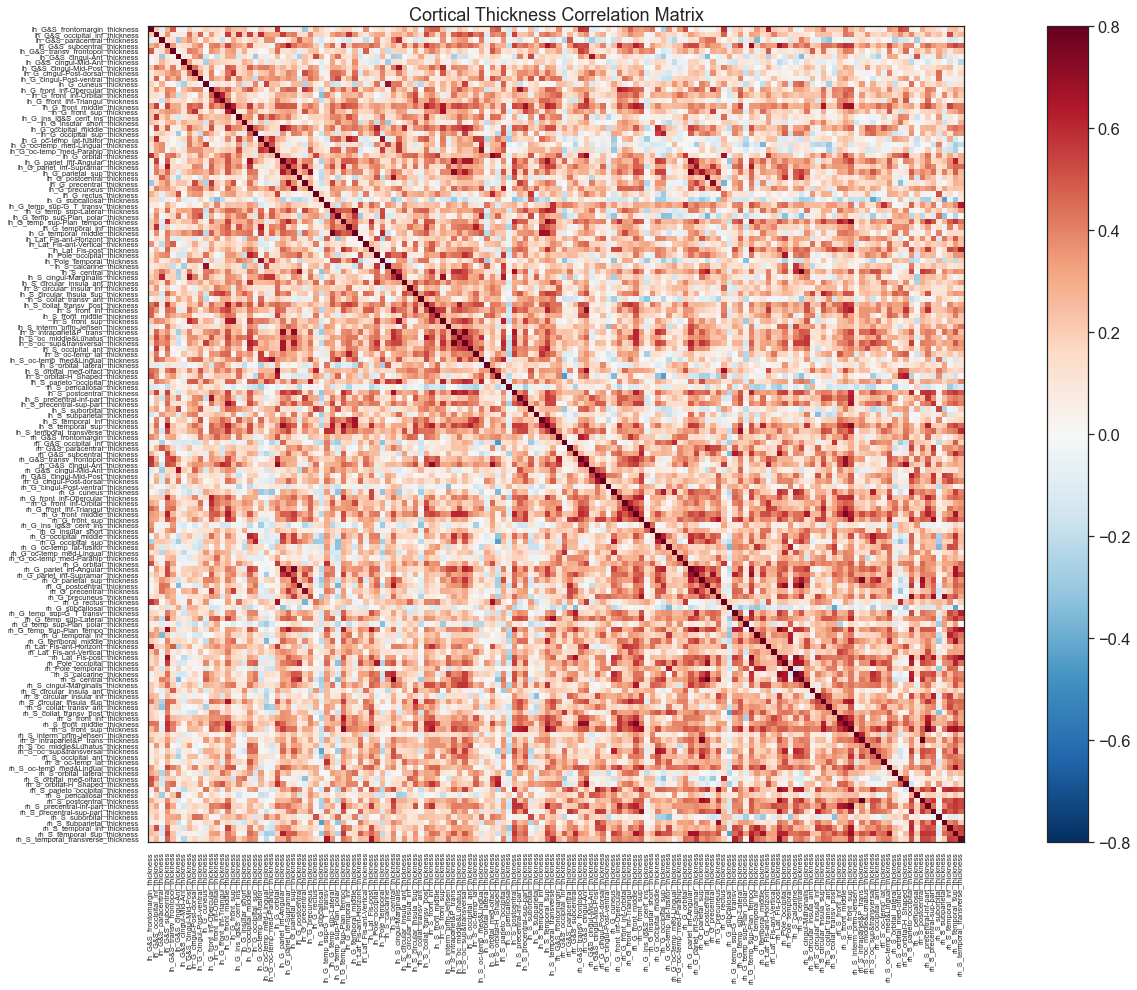

In [8]:
#Creates a correlation matrix graph
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
im = ax.imshow(M, cmap = "RdBu_r", vmin=-0.8, vmax=0.8)
ax.set_title("Cortical Thickness Correlation Matrix")

#Sets axis lables
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names, rotation=90, fontsize=7.5)
ax.set_yticklabels(names,fontsize=7.5)

fig.colorbar(im, orientation="vertical", fraction = 0.05)
plt.show()

In [9]:
#Creates SCN using the correlation matrix
G = scn.BrainNetwork(network=M, parcellation=names)

#Obtains weight data from an edge
G.edges[0,1]

{'weight': 0.2082235973044704}

In [10]:
#Binarizes the graph by thresholding the nodes at the top 10%
G10 = G.threshold(10)

In [11]:
#Prompt to test if a particular node still exists
try:
    G10.edges[(0,1)]
except KeyError:
    print("This edge does not exist!")

This edge does not exist!


In [12]:
#Calculates the network measures and prints them out
G10.calculate_nodal_measures()
G10_measures = G10.report_nodal_measures()
G10_measures

,name,module,degree,closeness,betweenness,shortest_path_length,clustering,participation_coefficient
0,lh_G&S_frontomargin_thickness,0,12,0.363861,0.002395,2.72973,0.515152,0.0
1,lh_G&S_occipital_inf_thickness,1,15,0.4375,0.013928,2.27027,0.371429,0.84
2,lh_G&S_paracentral_thickness,2,3,0.311441,0.000701,3.189189,0,0.555556
3,lh_G&S_subcentral_thickness,3,32,0.503425,0.01984,1.972973,0.447581,0.834961
4,lh_G&S_transv_frontopol_thickness,0,7,0.34186,0.001196,2.905405,0.47619,0.0
...,...,...,...,...,...,...,...,...
143,rh_S_suborbital_thickness,0,2,0.261101,0.0,3.804054,1.0,0.0
144,rh_S_subparietal_thickness,4,5,0.334852,0.00006,2.966216,0.9,0.0
145,rh_S_temporal_inf_thickness,4,27,0.457944,0.025925,2.168919,0.404558,0.834019
146,rh_S_temporal_sup_thickness,2,45,0.493289,0.048495,2.013514,0.356566,0.84


In [13]:
#Extracts values from the right orbital inferior frontal gyrus
print(G10_measures.loc[86])

#Extracts values from the right middle frontal gyrus
print(G10_measures.loc[88])

name                         rh_G_front_inf-Orbital_thickness
module                                                      0
degree                                                     12
closeness                                            0.415254
betweenness                                           0.00312
shortest_path_length                                 2.391892
clustering                                           0.469697
participation_coefficient                                0.75
Name: 86, dtype: object
name                         rh_G_front_middle_thickness
module                                                 0
degree                                                46
closeness                                       0.526882
betweenness                                     0.051965
shortest_path_length                            1.885135
clustering                                       0.34686
participation_coefficient                       0.931947
Name: 88, dtype: object


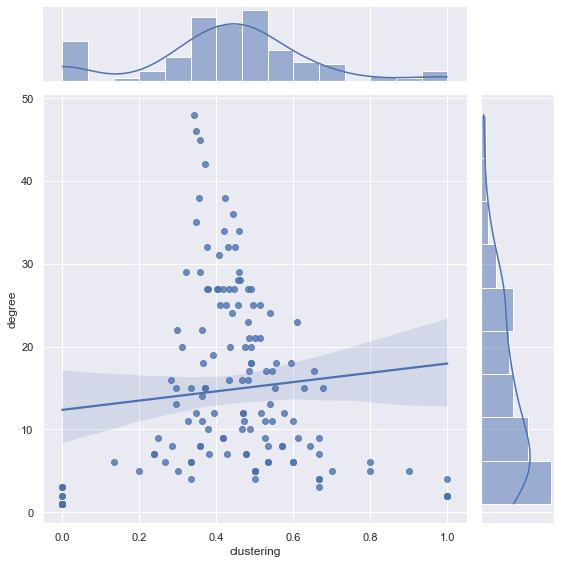

(0.10669232740116742, 0.19682505201348816)

In [14]:
#Creates a regression plot
nodal_df = G10.report_nodal_measures(columns=['degree', 'clustering'])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(data=nodal_df, y='degree', x='clustering', kind='reg', height=8)
plt.show()
st.pearsonr(nodal_df['degree'], nodal_df['clustering'])

In [15]:
#Calculates Global measures
G10.calculate_global_measures()

{'average_clustering': 0.42080603789011706,
 'average_shortest_path_length': 2.62465526751241,
 'assortativity': 0.23115899783636476,
 'modularity': 0.3506057897653547,
 'efficiency': 0.44867983873085965}

In [56]:
#Creates an initial brain bundle
brain_bundle = scn.GraphBundle([G10], ['thick_cost10'])

In [57]:
#Test to see if a dictionary like object has been created
brain_bundle

{'thick_cost10': <scona.classes.BrainNetwork at 0x20463cfe2e0>}

In [58]:
#Creates randomized graphs using the observed brain network as the baseline
brain_bundle.create_random_graphs('thick_cost10', 44)

        Creating 44 random graphs - may take a little while


In [59]:
#Test to see if the randomized graphs have been created
brain_bundle

{'thick_cost10': <scona.classes.BrainNetwork at 0x20463cfe2e0>,
 'thick_cost10_R0': <scona.classes.BrainNetwork at 0x2046cd71b20>,
 'thick_cost10_R1': <scona.classes.BrainNetwork at 0x2046f914b80>,
 'thick_cost10_R2': <scona.classes.BrainNetwork at 0x204701e0c10>,
 'thick_cost10_R3': <scona.classes.BrainNetwork at 0x2046f914eb0>,
 'thick_cost10_R4': <scona.classes.BrainNetwork at 0x20470d53100>,
 'thick_cost10_R5': <scona.classes.BrainNetwork at 0x2046d80c850>,
 'thick_cost10_R6': <scona.classes.BrainNetwork at 0x20470d53220>,
 'thick_cost10_R7': <scona.classes.BrainNetwork at 0x2046a4d2970>,
 'thick_cost10_R8': <scona.classes.BrainNetwork at 0x2046a4d2a30>,
 'thick_cost10_R9': <scona.classes.BrainNetwork at 0x2046a4d28e0>,
 'thick_cost10_R10': <scona.classes.BrainNetwork at 0x2046f8f8490>,
 'thick_cost10_R11': <scona.classes.BrainNetwork at 0x2046f8f8f70>,
 'thick_cost10_R12': <scona.classes.BrainNetwork at 0x2046f8f8c70>,
 'thick_cost10_R13': <scona.classes.BrainNetwork at 0x2046f8f8

In [60]:
#Reports on the global measures of the randomized graphs
average_global = brain_bundle.report_global_measures()
average_global

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
thick_cost10,0.420806,2.624655,0.231159,0.350606,0.448680
thick_cost10_R0,0.204637,2.255746,-0.056527,0.180701,0.493433
thick_cost10_R1,0.229670,2.253447,-0.096051,0.190039,0.494130
thick_cost10_R2,0.211036,2.250414,-0.069474,0.187663,0.494026
thick_cost10_R3,0.209404,2.260985,-0.092499,0.191370,0.492911
thick_cost10_R4,0.226446,2.242600,-0.075571,0.185827,0.495152
thick_cost10_R5,0.227384,2.253447,-0.091847,0.189415,0.493934
thick_cost10_R6,0.204040,2.244898,-0.076840,0.180558,0.494575
thick_cost10_R7,0.218571,2.242048,-0.111877,0.185755,0.495319
thick_cost10_R8,0.234310,2.222192,-0.117677,0.179156,0.497720


In [61]:
#Removes the first row due to outlier data (the observed graph)
average_global_noout = average_global.drop('thick_cost10')
average_global_noout

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
thick_cost10_R0,0.204637,2.255746,-0.056527,0.180701,0.493433
thick_cost10_R1,0.229670,2.253447,-0.096051,0.190039,0.494130
thick_cost10_R2,0.211036,2.250414,-0.069474,0.187663,0.494026
thick_cost10_R3,0.209404,2.260985,-0.092499,0.191370,0.492911
thick_cost10_R4,0.226446,2.242600,-0.075571,0.185827,0.495152
thick_cost10_R5,0.227384,2.253447,-0.091847,0.189415,0.493934
thick_cost10_R6,0.204040,2.244898,-0.076840,0.180558,0.494575
thick_cost10_R7,0.218571,2.242048,-0.111877,0.185755,0.495319
thick_cost10_R8,0.234310,2.222192,-0.117677,0.179156,0.497720
thick_cost10_R9,0.210303,2.230281,-0.084503,0.182115,0.496445


In [62]:
#Loads the neuropsych data
neuropsych = pd.read_csv('Neuropsych_data_wcit.csv')
neuropsych.head()

,Participant ID:,Inhibition: Time (seconds),Inhibition Scaled Score
0,P06,97,5
1,P07,49,14
2,P08,149,1
3,P101,80,6
4,P107,59,3


In [63]:
#Adding the inhibition scaled score and inhibition time columns from the neuropsych dataset into the random network graphs dataframe
average_global_noout['Inhibition Scaled Score'] = neuropsych['Inhibition Scaled Score'].values
average_global_noout['Inhibition: Time (seconds)'] = neuropsych['Inhibition: Time (seconds)'].values
average_global_noout

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency,Inhibition Scaled Score,Inhibition: Time (seconds)
thick_cost10_R0,0.204637,2.255746,-0.056527,0.180701,0.493433,5,97
thick_cost10_R1,0.229670,2.253447,-0.096051,0.190039,0.494130,14,49
thick_cost10_R2,0.211036,2.250414,-0.069474,0.187663,0.494026,1,149
thick_cost10_R3,0.209404,2.260985,-0.092499,0.191370,0.492911,6,80
thick_cost10_R4,0.226446,2.242600,-0.075571,0.185827,0.495152,3,59
thick_cost10_R5,0.227384,2.253447,-0.091847,0.189415,0.493934,2,99
thick_cost10_R6,0.204040,2.244898,-0.076840,0.180558,0.494575,2,103
thick_cost10_R7,0.218571,2.242048,-0.111877,0.185755,0.495319,8,72
thick_cost10_R8,0.234310,2.222192,-0.117677,0.179156,0.497720,10,68
thick_cost10_R9,0.210303,2.230281,-0.084503,0.182115,0.496445,8,71


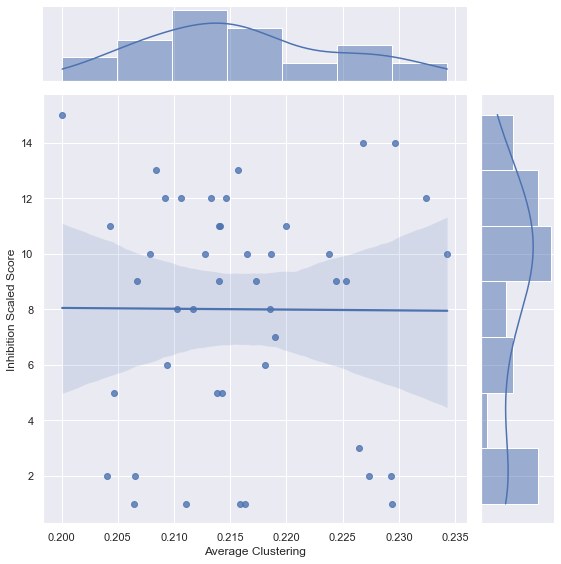

(-0.005783930425381285, 0.9702760806939494)

In [64]:
#Creates a regression plot for the scaled score vs clustering
sns.set(style="darkgrid", color_codes=True)
l = sns.jointplot(data=average_global_noout, y='Inhibition Scaled Score', x='average_clustering', kind='reg', height=8)
l.ax_joint.set_xlabel('Average Clustering')
plt.show()
st.pearsonr(average_global_noout['average_clustering'], average_global_noout['Inhibition Scaled Score'])

In [65]:
#Creates a regression model for scaled score vs clustering
import statsmodels.api as sm

#Sets variables
Y1 = average_global_noout['Inhibition Scaled Score']
X1= average_global_noout['average_clustering']

#Adds constant
X1 = sm.add_constant(X1)

#Prints out the results of the regression model
model1 = sm.OLS(Y1, X1, missing='drop')
results1= model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Inhibition Scaled Score   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.024
Method:                      Least Squares   F-statistic:                  0.001405
Date:                     Mon, 06 Jun 2022   Prob (F-statistic):              0.970
Time:                             23:39:24   Log-Likelihood:                -125.29
No. Observations:                       44   AIC:                             254.6
Df Residuals:                           42   BIC:                             258.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.6260     16.713      0.516      0.608     -25.103      42.355
average_clustering    -2.8973     77.292     -0.037      0.970    -158.878     153.084
==============================================================================
Omnibus:                        6.822   Durbin-Watson:                   2.525
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                3.224
Skew:                          -0.406   Prob(JB):                        0.199
Kurtosis:                       1.951   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Calculates the standard error of the estimate for score vs clustering
np.sqrt(results1.scale)

4.27053686362401

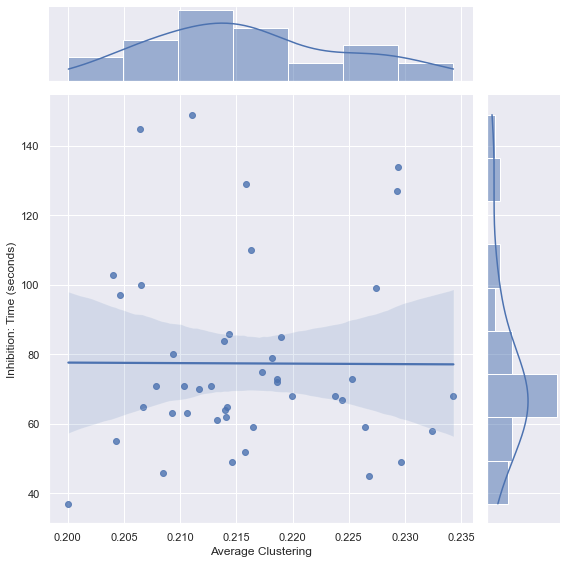

(-0.004632990814250063, 0.9761889163650511)

In [67]:
#Creates a regression plot for score vs inhibition time
sns.set(style="darkgrid", color_codes=True)
m = sns.jointplot(data=average_global_noout, y='Inhibition: Time (seconds)', x='average_clustering', kind='reg', height=8)
m.ax_joint.set_xlabel('Average Clustering')
plt.show()
st.pearsonr(average_global_noout['average_clustering'], average_global_noout['Inhibition: Time (seconds)'])

In [68]:
#Creates regression model for the clustering vs time data
import statsmodels.api as sm

#Sets variables
Y2 = average_global_noout['Inhibition: Time (seconds)']
X2= average_global_noout['average_clustering']

#Adds constant
X2 = sm.add_constant(X2)

#Prints out the results of the regression model
model2 = sm.OLS(Y2, X2, missing='drop')
results2= model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Inhibition: Time (seconds)   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.024
Method:                         Least Squares   F-statistic:                 0.0009015
Date:                        Mon, 06 Jun 2022   Prob (F-statistic):              0.976
Time:                                23:39:31   Log-Likelihood:                -206.56
No. Observations:                          44   AIC:                             417.1
Df Residuals:                              42   BIC:                             420.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 80.5889    105.981      0.760      0.451    -133.290     294.468
average_clustering   -14.7161    490.119     -0.030      0.976   -1003.816     974.384
==============================================================================
Omnibus:                       11.071   Durbin-Watson:                   2.779
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.855
Skew:                           1.163   Prob(JB):                      0.00439
Kurtosis:                       3.716   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Calculates the standard error of the estimate for the clustering vs time data
np.sqrt(results2.scale)

27.080117130724307

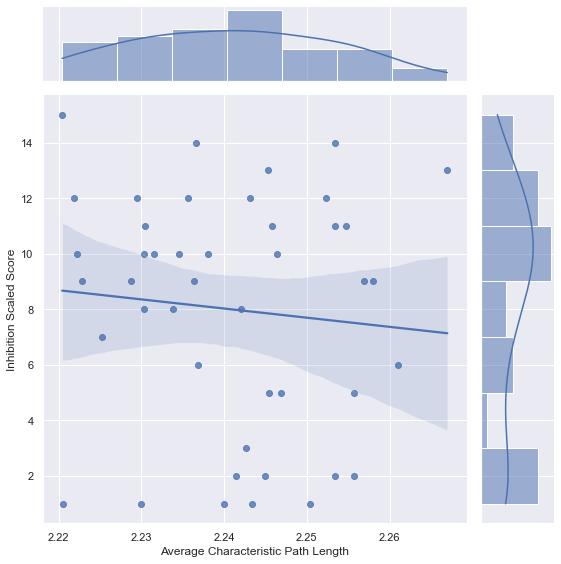

(-0.09401361381416945, 0.543844436711604)

In [70]:
#Creates a regression plot for the scaled score vs path
sns.set(style="darkgrid", color_codes=True)
n = sns.jointplot(data=average_global_noout, y='Inhibition Scaled Score', x='average_shortest_path_length', kind='reg', height=8)
n.ax_joint.set_xlabel('Average Characteristic Path Length')
plt.show()
st.pearsonr(average_global_noout['average_shortest_path_length'], average_global_noout['Inhibition Scaled Score'])

In [71]:
#Creates a regression model for scaled score vs path
import statsmodels.api as sm

#Sets variables
Y3 = average_global_noout['Inhibition Scaled Score']
X3= average_global_noout['average_shortest_path_length']

#Adds constant
X3 = sm.add_constant(X3)

#Prints out the results of the regression model
model3 = sm.OLS(Y3, X3, missing='drop')
results3= model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Inhibition Scaled Score   R-squared:                       0.009
Model:                                 OLS   Adj. R-squared:                 -0.015
Method:                      Least Squares   F-statistic:                    0.3745
Date:                     Mon, 06 Jun 2022   Prob (F-statistic):              0.544
Time:                             23:39:41   Log-Likelihood:                -125.09
No. Observations:                       44   AIC:                             254.2
Df Residuals:                           42   BIC:                             257.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           81.8387    120.656      0.678      0.501    -161.654     325.331
average_shortest_path_length   -32.9520     53.844     -0.612      0.544    -141.614      75.710
==============================================================================
Omnibus:                        5.690   Durbin-Watson:                   2.676
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                2.967
Skew:                          -0.397   Prob(JB):                        0.227
Kurtosis:                       2.006   Cond. No.                         506.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Calculates the standard error of the estimate for the score vs path data
np.sqrt(results3.scale)

4.251693397537487

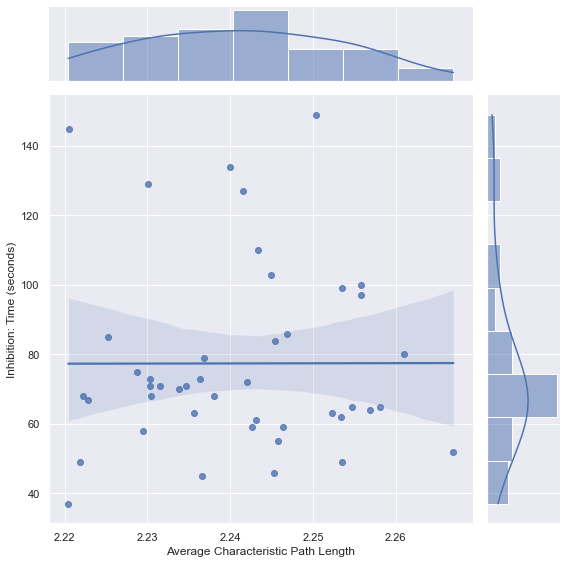

(0.001758199370375857, 0.9909626930198067)

In [73]:
#Creates a regression plot for the time vs path
sns.set(style="darkgrid", color_codes=True)
o = sns.jointplot(data=average_global_noout, y='Inhibition: Time (seconds)', x='average_shortest_path_length', kind='reg', height=8)
o.ax_joint.set_xlabel('Average Characteristic Path Length')
plt.show()
st.pearsonr(average_global_noout['average_shortest_path_length'], average_global_noout['Inhibition: Time (seconds)'])

In [74]:
#Creates a regression model for time vs path
import statsmodels.api as sm

#Sets variables
Y4 = average_global_noout['Inhibition: Time (seconds)']
X4= average_global_noout['average_shortest_path_length']

#Adds constant
X4 = sm.add_constant(X4)

#Prints out the results of the regression model
model4 = sm.OLS(Y4, X4, missing='drop')
results4= model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Inhibition: Time (seconds)   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.024
Method:                         Least Squares   F-statistic:                 0.0001298
Date:                        Mon, 06 Jun 2022   Prob (F-statistic):              0.991
Time:                                23:40:10   Log-Likelihood:                -206.56
No. Observations:                          44   AIC:                             417.1
Df Residuals:                              42   BIC:                             420.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           68.6527    768.493      0.089      0.929   -1482.228    1619.534
average_shortest_path_length     3.9077    342.950      0.011      0.991    -688.194     696.009
==============================================================================
Omnibus:                       11.102   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.895
Skew:                           1.165   Prob(JB):                      0.00431
Kurtosis:                       3.719   Cond. No.                         506.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Calculates the standard error of the estimate for the time vs path data
np.sqrt(results4.scale)

27.08036591100574